# Data exploration

Let's take a look a the US import data to get a feel for what is in this easily available dataset. I have aggregated the data to the HS2 level to keep the dataset small. The unit of observation is `month-country-commodity`

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
imp = pd.read_hdf('2013-2021-hs02.h5', key='df')
imp.head()

GEN_VAL_MO  CC_MO  AIR_VAL_MO  VES_VAL_MO  \
time    CTY_CODE I_COMMODITY                                              
2013-01 1010     99                 1799      1           0           0   
        1220     10            294877982  10520      100240    11331837   
                 11             48838192   3002           0      211861   
                 12             82681695   6216       45777           0   
                 13              1159214     35       27331           0   

                              VES_WGT_MO  GEN_QY1_MO  GEN_QY2_MO  AIR_WGT_MO  \
time    CTY_CODE I_COMMODITY                                                   
2013-01 1010     99                    0           0           0           0   
        1220     10             31347572   451156735    63618649         566   
                 11               275217    76418780           0           0   
                 12                    0    97372521           0        1314   
                 13                    0       76621           0          67   

                             COMM_LVL  
time    CTY_CODE I_COMMODITY           
2013-01 1010     99               HS2  
        1220     10               HS2  
                 11               HS2  
                 12               HS2  
                 13               HS2

In [4]:
imp.dtypes

GEN_VAL_MO     int64
CC_MO          int64
AIR_VAL_MO     int64
VES_VAL_MO     int64
VES_WGT_MO     int64
GEN_QY1_MO     int64
GEN_QY2_MO     int64
AIR_WGT_MO     int64
COMM_LVL      object
dtype: object

The variables
* GEN_VAL_MO value of the HS2-month in dollars
* AIR_VAL_MO the value of the HS2-month that arrived by air
* VES_VAL_MO the value of the HS2-month that arrived by ship
* The quantitites (GEN_QY1_MO, GEN_QY2_MO) 
* The weights (AIR_WGT_MO, VES_WGT_MO) 
* The number of `cards` received in the HS2-month. This is a measure of the number of shipments of that HS2 were made in the month.  

## Total imports

There is a lot of volatility and seasonality in trade. 

In [9]:
totals = imp.groupby(['time']).sum()
totals.index = pd.to_datetime(totals.index)

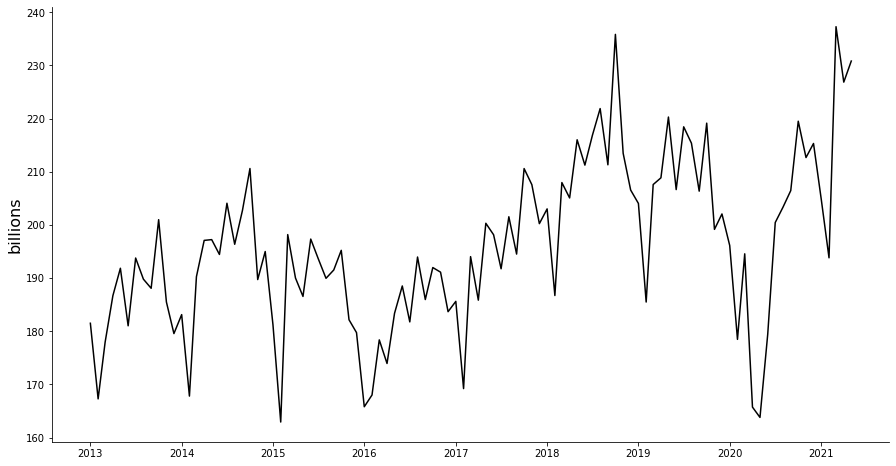

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(totals.index, totals['GEN_VAL_MO']/1000000000, color='black')
ax.set_ylabel('billions', fontsize=16)

sns.despine()

## How do imports arrive?

The data break out shipments by air and by vessel. How important is air shipping?

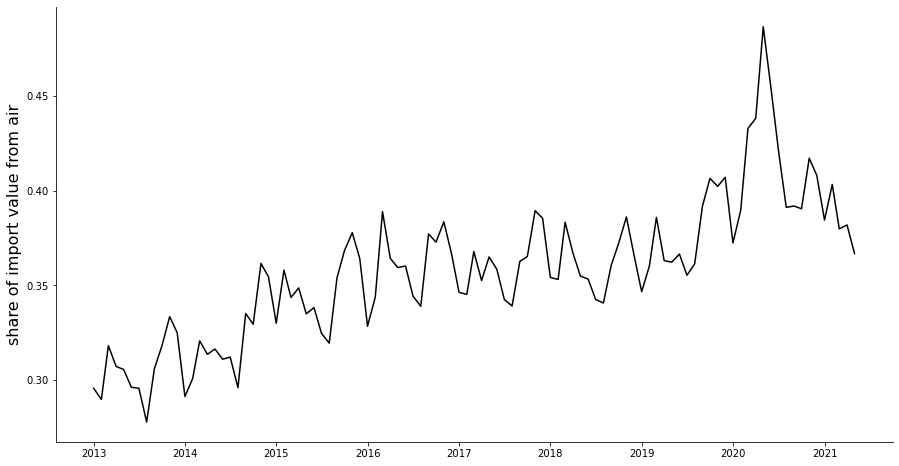

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(totals.index, totals['AIR_VAL_MO']/(totals['AIR_VAL_MO']+totals['VES_VAL_MO']), color='black')
ax.set_ylabel('share of import value from air', fontsize=16)

sns.despine()

What happened in 2020 that caused the spike in air transport?

## What kind of goods are flown?

High-value, low-weight, apparantly. 

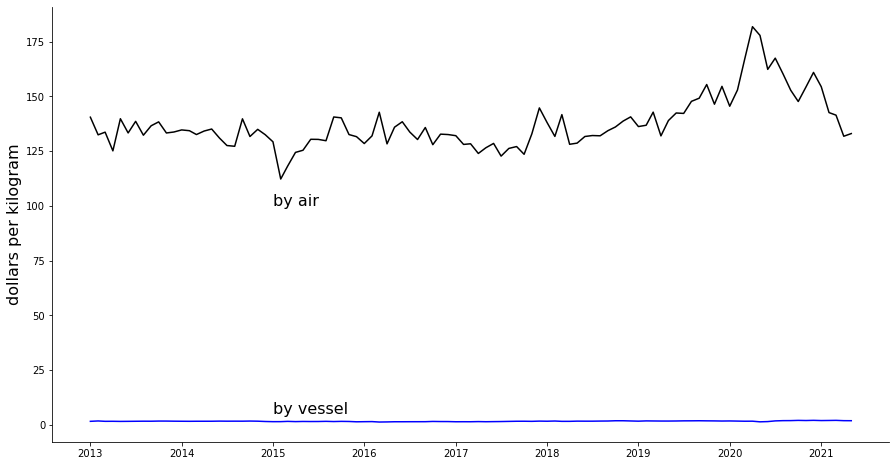

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(totals.index, totals['AIR_VAL_MO']/totals['AIR_WGT_MO'], color='black')
ax.plot(totals.index, totals['VES_VAL_MO']/totals['VES_WGT_MO'], color='blue')
ax.set_ylabel('dollars per kilogram', fontsize=16)
ax.text(dt.datetime(2015,1,1), 100, 'by air', fontsize=16 )
ax.text(dt.datetime(2015,1,1), 5, 'by vessel', fontsize=16 )

sns.despine()

## Commodities

In [30]:
hs2 = imp.groupby(['time', 'I_COMMODITY']).sum()
hs2.head()

GEN_VAL_MO  CC_MO  AIR_VAL_MO  VES_VAL_MO  VES_WGT_MO  \
time    I_COMMODITY                                                          
2013-01 10            504372722  13724    38206202   139168745   294946357   
        11            107693643   5381      168571    51004106    48097931   
        12            231901261   9836    30903114   103920814    68389257   
        13            143917384   1603    21022450   104310972    14979687   
        14              5123579    336       34251     3390003     4974993   

                     GEN_QY1_MO  GEN_QY2_MO  AIR_WGT_MO  
time    I_COMMODITY                                      
2013-01 10            716215714    80444281      425103  
        11            134176120           0       44098  
        12            168805402           0      561299  
        13             16910384           0      230218  
        14              3191865           0       14168

In [43]:
elec = hs2.xs('85', level=1)
elec.index = pd.to_datetime(elec.index)
elec.head()

GEN_VAL_MO   CC_MO   AIR_VAL_MO  VES_VAL_MO  VES_WGT_MO  \
time                                                                   
2013-01-01  22803787520  591987  10398705507  6886926993   511361923   
2013-02-01  20273895706  563689   8498164164  6540161968   468874678   
2013-03-01  22028304965  616182  10224186441  5825264673   424190445   
2013-04-01  24024066483  655613  11027614054  6984130705   515416454   
2013-05-01  25692470678  669705  12531963103  6965080174   526549283   

             GEN_QY1_MO  GEN_QY2_MO  AIR_WGT_MO  
time                                             
2013-01-01  17999080034    53882189    43424902  
2013-02-01  17745474683    50747203    38909943  
2013-03-01  19426584892    49224156    49709600  
2013-04-01  21955006746    55494846    51847236  
2013-05-01  21087342924    56768973    52952729

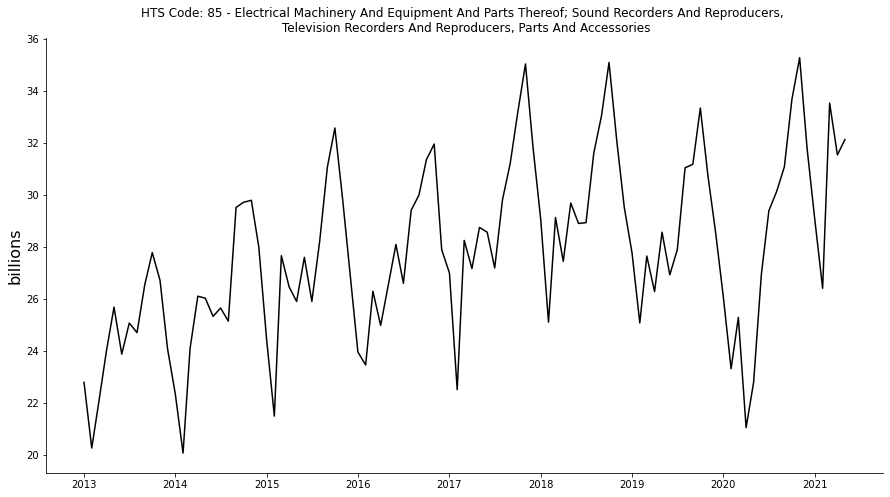

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(elec.index, elec['GEN_VAL_MO']/1000000000, color='black')
ax.set_ylabel('billions', fontsize=16)
ax.set_title('HTS Code: 85 - Electrical Machinery And Equipment And Parts Thereof; Sound Recorders And Reproducers, \n Television Recorders And Reproducers, Parts And Accessories')

sns.despine()

In [55]:
top85 = imp.loc['2021-01'].xs('85', level=1).sort_values('GEN_VAL_MO', ascending=False)
top85.head()

GEN_VAL_MO   CC_MO  AIR_VAL_MO  VES_VAL_MO  VES_WGT_MO  GEN_QY1_MO  \
CTY_CODE                                                                        
5700      10194775507  251143  5677896979  4117775249   443559535  6168081527   
2010       5160241116  270195   165061115     9448655     1067659  1954145093   
5520       2357712350   24152  1086362465  1226602933   106100110   179163425   
5570       2051414315   39141  1577500216   424284485    58544001  3161669271   
5830       1595729623   40325  1004869263   507623351    23022010  1734994643   

          GEN_QY2_MO  AIR_WGT_MO COMM_LVL  
CTY_CODE                                   
5700        30440054    26982958      HS2  
2010        60179027     1457688      HS2  
5520       583063108     4014767      HS2  
5570       668412657     2931684      HS2  
5830        17562261     3511145      HS2

In [61]:
names = pd.read_stata('country.dta')
top85 = pd.merge(left=top85, right=names, left_index=True, right_on='cty_code')

In [62]:
top85.head()

GEN_VAL_MO   CC_MO  AIR_VAL_MO  VES_VAL_MO  VES_WGT_MO  GEN_QY1_MO  \
141  10194775507  251143  5677896979  4117775249   443559535  6168081527   
3     5160241116  270195   165061115     9448655     1067659  1954145093   
129   2357712350   24152  1086362465  1226602933   106100110   179163425   
132   2051414315   39141  1577500216   424284485    58544001  3161669271   
146   1595729623   40325  1004869263   507623351    23022010  1734994643   

     GEN_QY2_MO  AIR_WGT_MO COMM_LVL  cty_code cty_desc  cty_name  
141    30440054    26982958      HS2      5700    CHINA     CHINA  
3      60179027     1457688      HS2      2010   MEXICO    MEXICO  
129   583063108     4014767      HS2      5520  VIETNAM   VIETNAM  
132   668412657     2931684      HS2      5570  MALAYSA  MALAYSIA  
146    17562261     3511145      HS2      5830   TAIWAN    TAIWAN

In [64]:
top85['share'] = top85['GEN_VAL_MO']/(top85['GEN_VAL_MO'].sum())

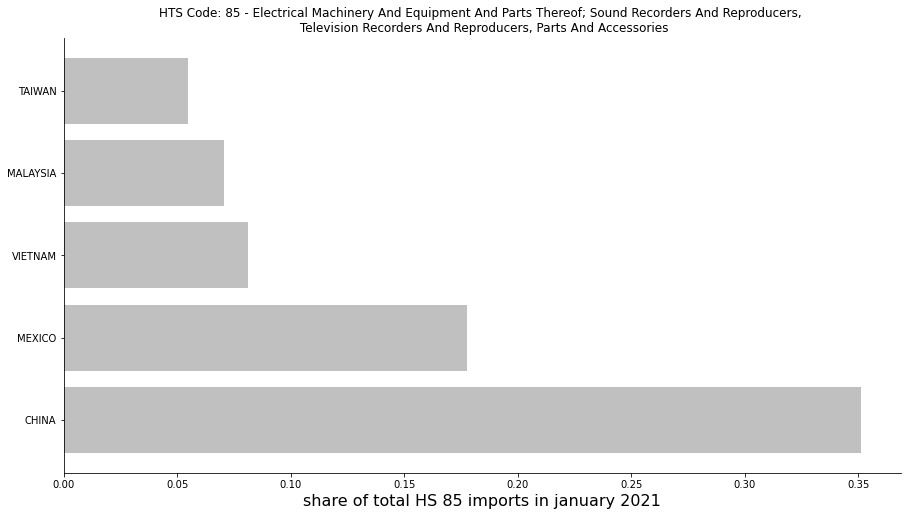

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(top85.iloc[0:5]['cty_name'], top85.iloc[0:5]['share'], color='silver')
ax.set_xlabel('share of total HS 85 imports in january 2021', fontsize=16)
ax.set_title('HTS Code: 85 - Electrical Machinery And Equipment And Parts Thereof; Sound Recorders And Reproducers, \n Television Recorders And Reproducers, Parts And Accessories')

sns.despine()